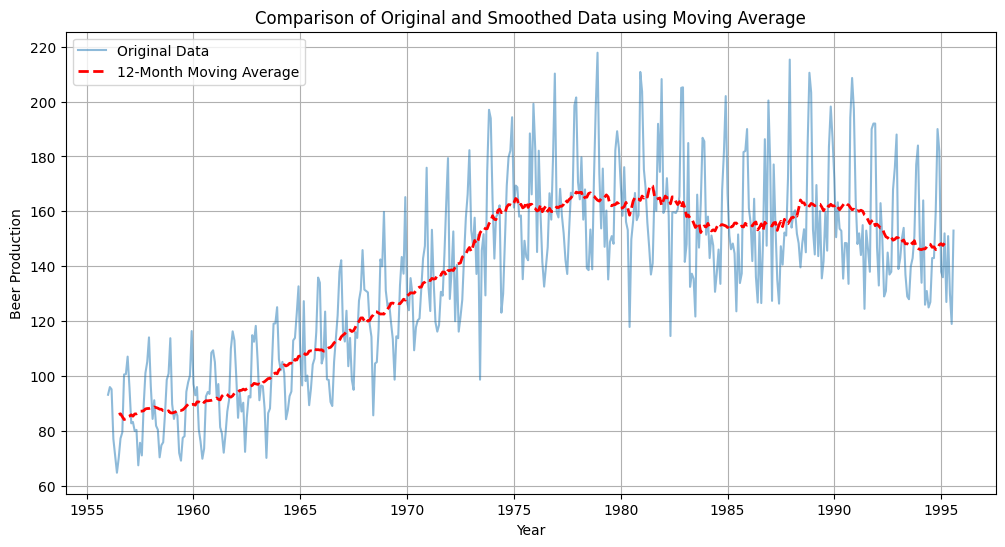

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-3-cc076292ad11>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='M')[1:]


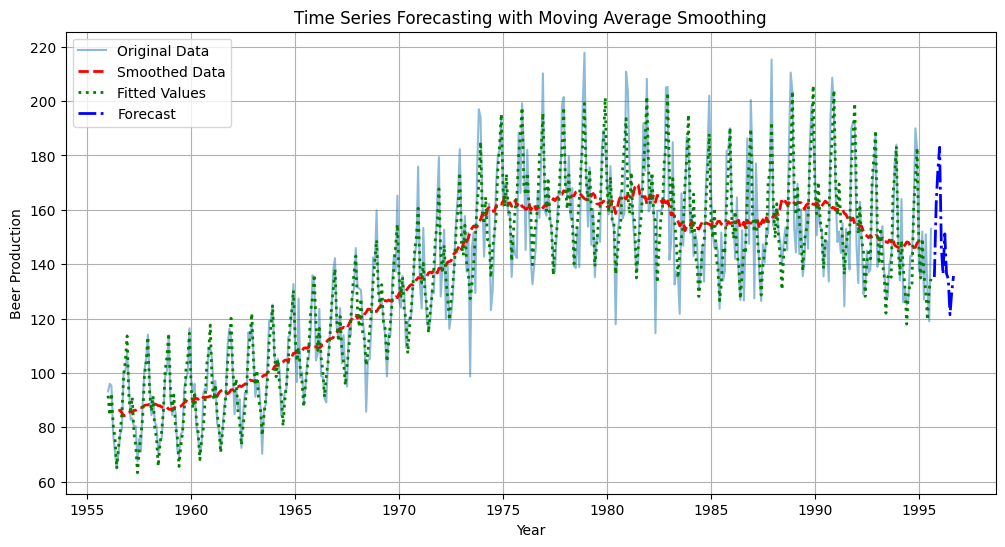

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
file_path = "monthly-beer.csv"
df = pd.read_csv(file_path)

# Convert 'Month' to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as index
df.set_index('Month', inplace=True)

# Apply moving average smoothing (12-month window)
df['Moving_Avg_12'] = df['Monthly beer production'].rolling(window=12, center=True).mean()

# Plot original data vs. smoothed data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Monthly beer production'], label="Original Data", alpha=0.5)
plt.plot(df.index, df['Moving_Avg_12'], label="12-Month Moving Average", linewidth=2, linestyle="dashed", color='red')
plt.legend()
plt.title("Comparison of Original and Smoothed Data using Moving Average")
plt.xlabel("Year")
plt.ylabel("Beer Production")
plt.grid()
plt.show()

# Apply exponential smoothing for time series forecasting
model = ExponentialSmoothing(df['Monthly beer production'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['Forecast'] = model.fittedvalues

# Forecast future values
future_steps = 12
future_index = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='M')[1:]
future_forecast = model.forecast(future_steps)

# Plot original data, smoothed data, and forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Monthly beer production'], label="Original Data", alpha=0.5)
plt.plot(df.index, df['Moving_Avg_12'], label="Smoothed Data", linewidth=2, linestyle="dashed", color='red')
plt.plot(df.index, df['Forecast'], label="Fitted Values", linewidth=2, linestyle="dotted", color='green')
plt.plot(future_index, future_forecast, label="Forecast", linewidth=2, linestyle="dashdot", color='blue')
plt.legend()
plt.title("Time Series Forecasting with Moving Average Smoothing")
plt.xlabel("Year")
plt.ylabel("Beer Production")
plt.grid()
plt.show()